In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller, kpss
import os
import sys
import json
import requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 12053)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
Data variables:
    thetao   (time) float32 ...

In [4]:
rcParams['figure.figsize'] = 18, 8
#rcParams['lines.linewidth'] = 1

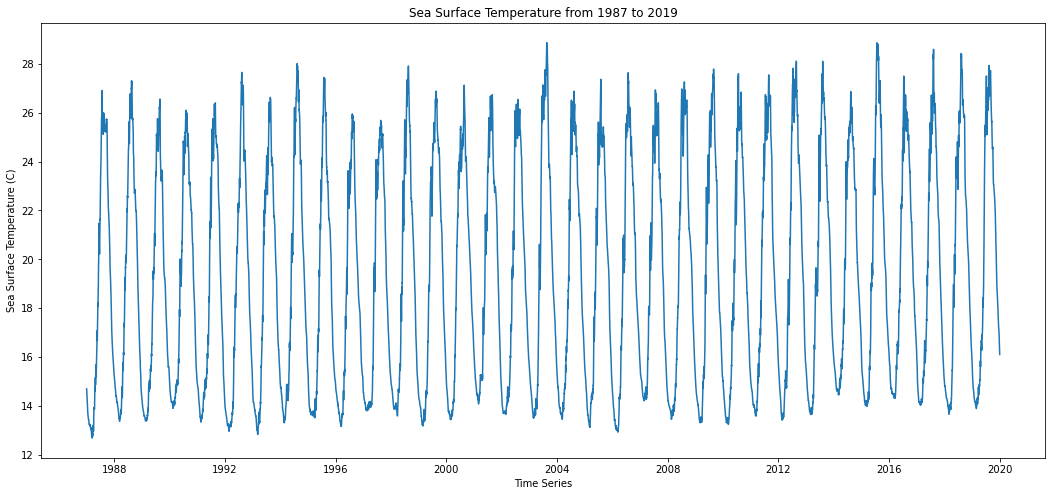

In [5]:
#plot in time series
plt.plot(ds.time,ds.thetao.squeeze());

plt.xlabel('Time Series')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature from 1987 to 2019');

In [6]:
#CONVERSIONE DAL XARRAY A PANDAS-1----- data list(datasets) by variable thetao in coords depth and time
df = ds.to_dataframe()
df.head()

,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793


In [7]:
#df.thetao.plot();


TypeError: 'Series' object is not callable

In [8]:
#CONVERSIONE DAL XARRAY A PANDAS-2----datasets to dataframe in time series indexed in time


df = ds.to_dataframe().reset_index().set_index('time')
df.head()

,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793


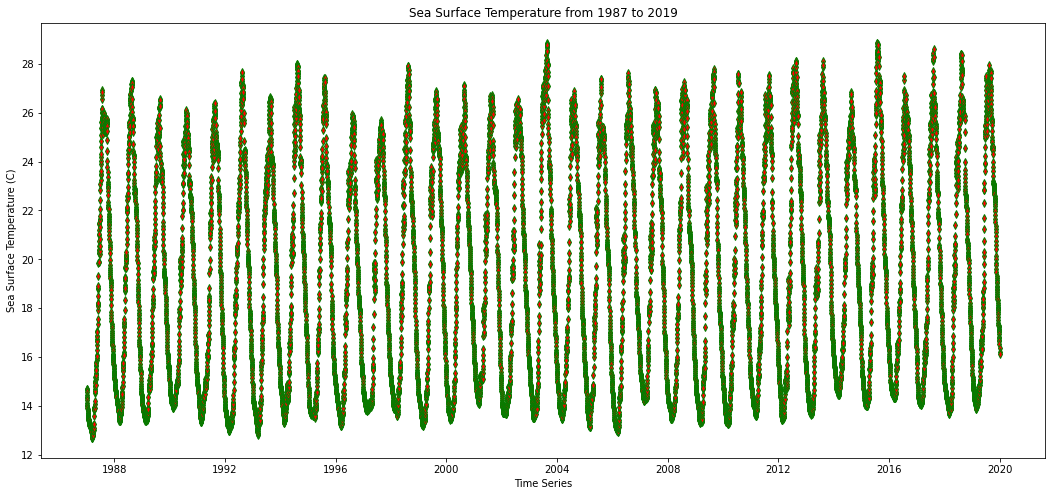

In [9]:
###sea surface temperature markered in 12 months

plt.plot(df.index,df.thetao, color='red', linestyle='', 
         marker='d', markerfacecolor='r', markeredgecolor='g', markersize=5)


plt.xlabel('Time Series')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature from 1987 to 2019');

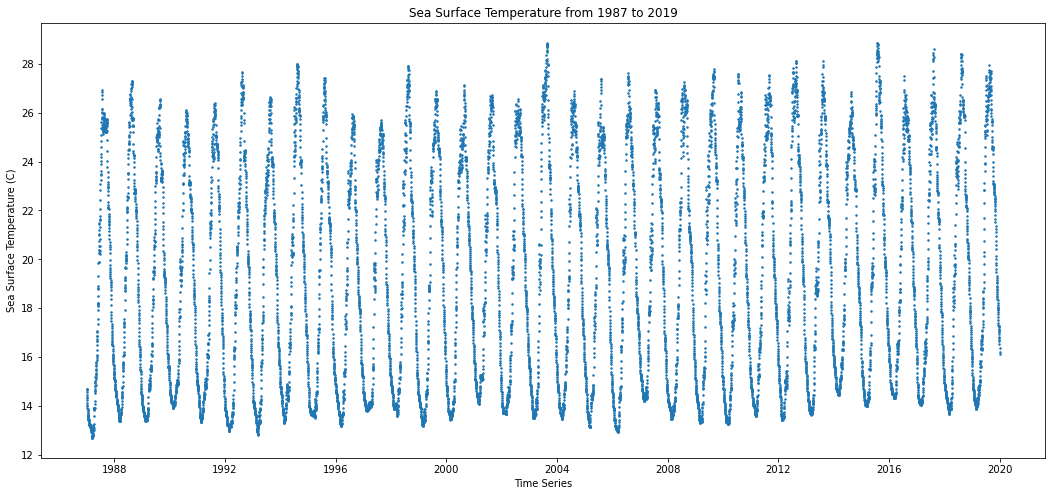

In [10]:
plt.plot(df.thetao, linestyle='', marker='.', markersize=3)
plt.xlabel('Time Series')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature from 1987 to 2019');

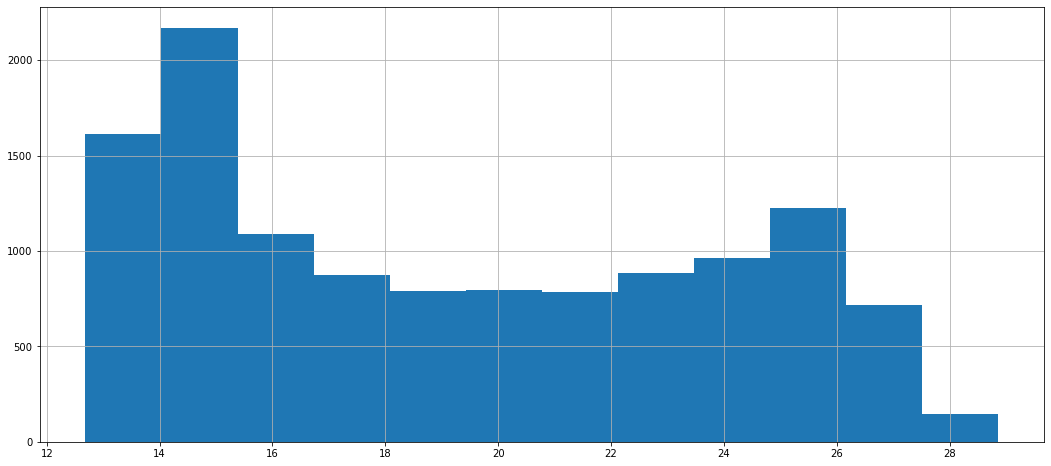

In [11]:
df['thetao'].hist(bins=12);


In [12]:
import seaborn as sns


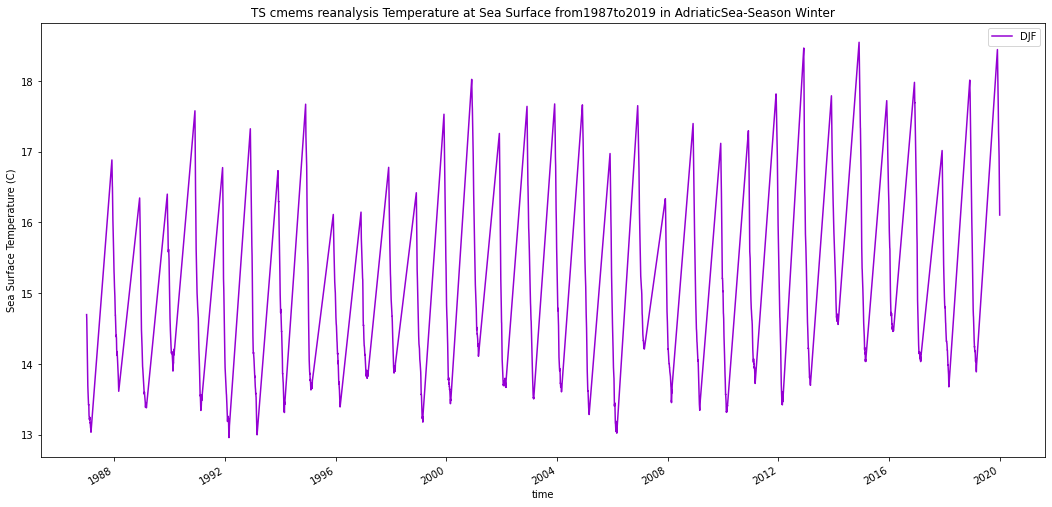

In [13]:
ds1_season_inv = ds['thetao'].groupby('time.season')['DJF']

ds1_season_inv.plot(color='darkviolet', label='DJF')
title = "TS cmems reanalysis Temperature at Sea Surface from1987to2019 in AdriaticSea-Season Winter"
plt.ylabel('Sea Surface Temperature (C)')
plt.title(title)
plt.legend();

In [14]:
df1_season_inv = ds1_season_inv.to_dataframe()
df1_season_inv

,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793
...,...,...
2019-12-27 12:00:00,1.018237,16.640701
2019-12-28 12:00:00,1.018237,16.531431
2019-12-29 12:00:00,1.018237,16.363058


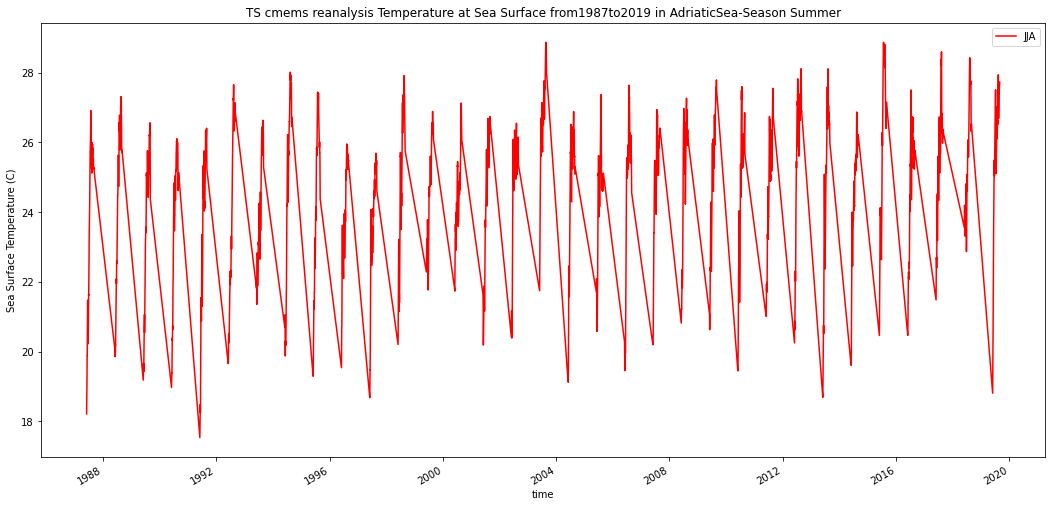

In [15]:
df1_season_est = ds['thetao'].groupby('time.season')['JJA']
df1_season_est.plot(color='r', label='JJA') 
title = "TS cmems reanalysis Temperature at Sea Surface from1987to2019 in AdriaticSea-Season Summer"
plt.ylabel('Sea Surface Temperature (C)')
plt.title(title)
plt.legend();

In [16]:
df1_season_est = df1_season_est.to_dataframe()
df1_season_est

,depth,thetao
time,,
1987-06-01 12:00:00,1.018237,18.209923
1987-06-02 12:00:00,1.018237,18.487085
1987-06-03 12:00:00,1.018237,18.779093
1987-06-04 12:00:00,1.018237,18.819464
1987-06-05 12:00:00,1.018237,18.891378
...,...,...
2019-08-27 12:00:00,1.018237,27.550367
2019-08-28 12:00:00,1.018237,27.648264
2019-08-29 12:00:00,1.018237,27.646145


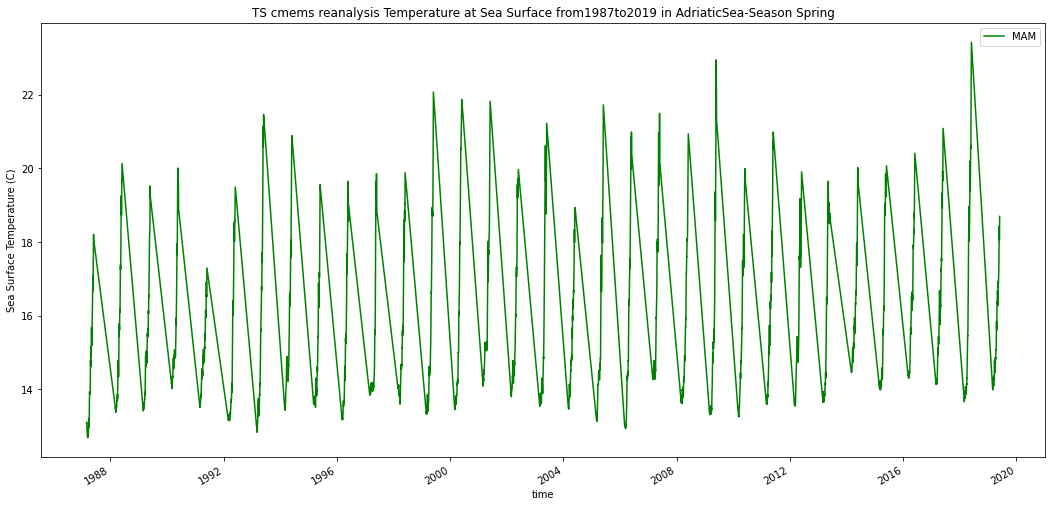

In [17]:
df1_season_prim = ds['thetao'].groupby('time.season')['MAM']
df1_season_prim.plot(color='g', label='MAM')

title = "TS cmems reanalysis Temperature at Sea Surface from1987to2019 in AdriaticSea-Season Spring"
plt.ylabel('Sea Surface Temperature (C)')
plt.title(title)
plt.legend();

In [18]:
df1_season_prim = df1_season_prim.to_dataframe()
df1_season_prim

,depth,thetao
time,,
1987-03-01 12:00:00,1.018237,13.085732
1987-03-02 12:00:00,1.018237,13.101664
1987-03-03 12:00:00,1.018237,13.066791
1987-03-04 12:00:00,1.018237,13.006888
1987-03-05 12:00:00,1.018237,12.958860
...,...,...
2019-05-27 12:00:00,1.018237,18.052254
2019-05-28 12:00:00,1.018237,18.169252
2019-05-29 12:00:00,1.018237,18.375246


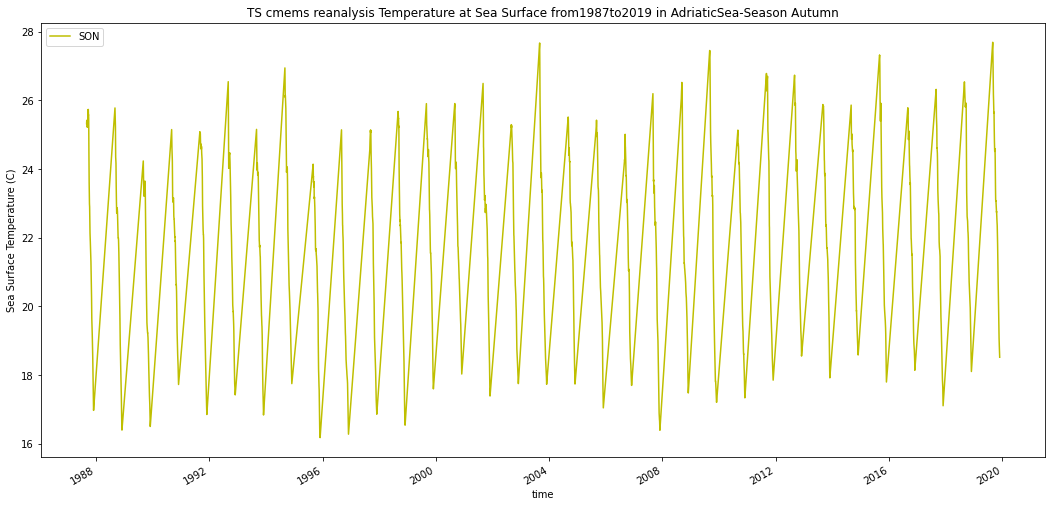

In [19]:
df1_season_aut = ds['thetao'].groupby('time.season')['SON']
df1_season_aut.plot(color='y', label='SON')
title = "TS cmems reanalysis Temperature at Sea Surface from1987to2019 in AdriaticSea-Season Autumn"
plt.ylabel('Sea Surface Temperature (C)')
plt.title(title)
plt.legend();

In [20]:
df1_season_aut = df1_season_aut.to_dataframe()
df1_season_aut

,depth,thetao
time,,
1987-09-01 12:00:00,1.018237,25.323425
1987-09-02 12:00:00,1.018237,25.414513
1987-09-03 12:00:00,1.018237,25.418957
1987-09-04 12:00:00,1.018237,25.334354
1987-09-05 12:00:00,1.018237,25.379837
...,...,...
2019-11-26 12:00:00,1.018237,18.792850
2019-11-27 12:00:00,1.018237,18.741970
2019-11-28 12:00:00,1.018237,18.657505


In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse 
import matplotlib as mpl


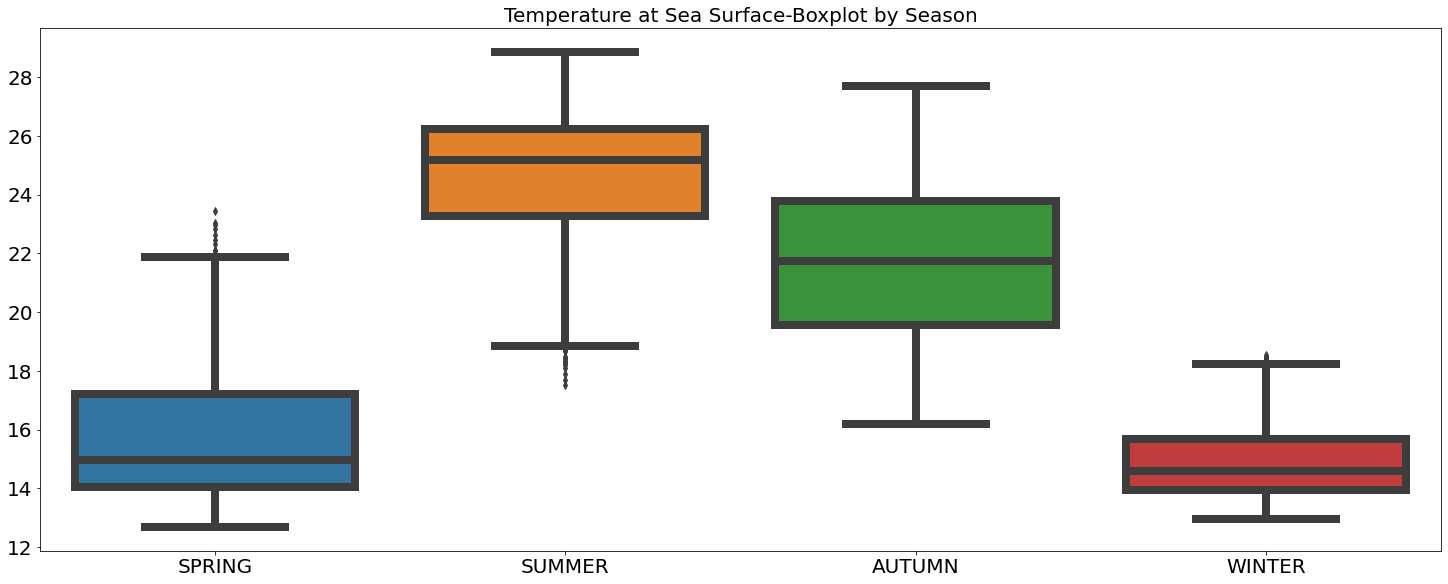

In [22]:
fig,axes = plt.subplots(1,figsize=(20, 8),constrained_layout=True, linewidth=10)


#sns.boxplot(data=[df1_season_est.thetao,df1_season_inv.thetao,df1_season_prim.thetao,df1_season_aut.thetao], palette="tab10")
sns.boxplot(data=[df1_season_prim.thetao,df1_season_est.thetao,df1_season_aut.thetao,df1_season_inv.thetao], palette="tab10",linewidth=8)

axes.set_xticklabels(['SPRING', 'SUMMER',
                    'AUTUMN', 'WINTER'])
axes.set_title('Temperature at Sea Surface-Boxplot by Season', fontsize=20); 
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig('Temperature at Sea Surface-Boxplot by Season.png')
plt.show()
plt.close()

In [53]:
print(len(x))

600


In [54]:
print(len(g))

TypeError: object of type 'FacetGrid' has no len()